In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [18]:
actual_computes = []
algorithmic_computes = []
energy = []
cycles = []
pjs_algorithmic = []
pjs_actual = []
gflops = []

In [19]:
import os
arch = "04.2.2-eyeriss-like-gating-mapspace-search"
plot_folder = "eyeriss_like_gating_mapspace_search_plots"
# arch ="04.2.3-eyeriss-like-onchip-compression"
# plot_folder = "eyeriss_like_onchip_compression_plots"
if not os.path.exists(plot_folder):
    os.mkdir(plot_folder)
# i = 5
for i in range(1,13):
    df1 = pd.read_csv("sparse_arch/{}/sparse_layers/sparse_pointNet_layer{}/summary_output.csv".format(arch,i))
    df2 = pd.read_csv("sparse_arch/{}/dense_layers/dense_pointNet_layer{}/summary_output.csv".format(arch,i))
    actual_computes.append([df1["Actual Computes"][0], df2['Actual Computes'][0]])
    algorithmic_computes.append([df1["Algorithmic Computes"][0], df2['Algorithmic Computes'][0]])
    energy.append([df1["Energy"][0], df2['Energy'][0]])
    cycles.append([df1["Cycles"][0], df2['Cycles'][0]])
    gflops.append([df1["GFLOPs"][0], df2['GFLOPs'][0]])
    pjs_algorithmic.append([df1["pj_algorithmic_compute"][0], df2['pj_algorithmic_compute'][0]])
    pjs_actual.append([df1["pj_actual_compute"][0], df2['pj_actual_compute'][0]])

In [20]:
# df['Algorithmic Computes'][0]
energy = np.array(energy)

gflops = np.array(gflops)
cycles = np.array(cycles)
actual_computes = np.array(actual_computes)
algorithmic_computes = np.array(algorithmic_computes)
pjs_algorithmic = np.array(pjs_algorithmic)
pjs_actual = np.array(pjs_actual)

In [5]:
df1

,GFLOPs,Utilization,Cycles,Energy,Area,Algorithmic Computes,Actual Computes,pj_algorithmic_compute,pj_actual_compute
0,158.21,0.47,33.0,0.39,0.0,5120.0,2612.0,76.21,149.39


Energy
Actual computes
Cycles
Algorithmic Computes
pj_Algorithmic Compute
pj_Actual Compute
GFLOPs


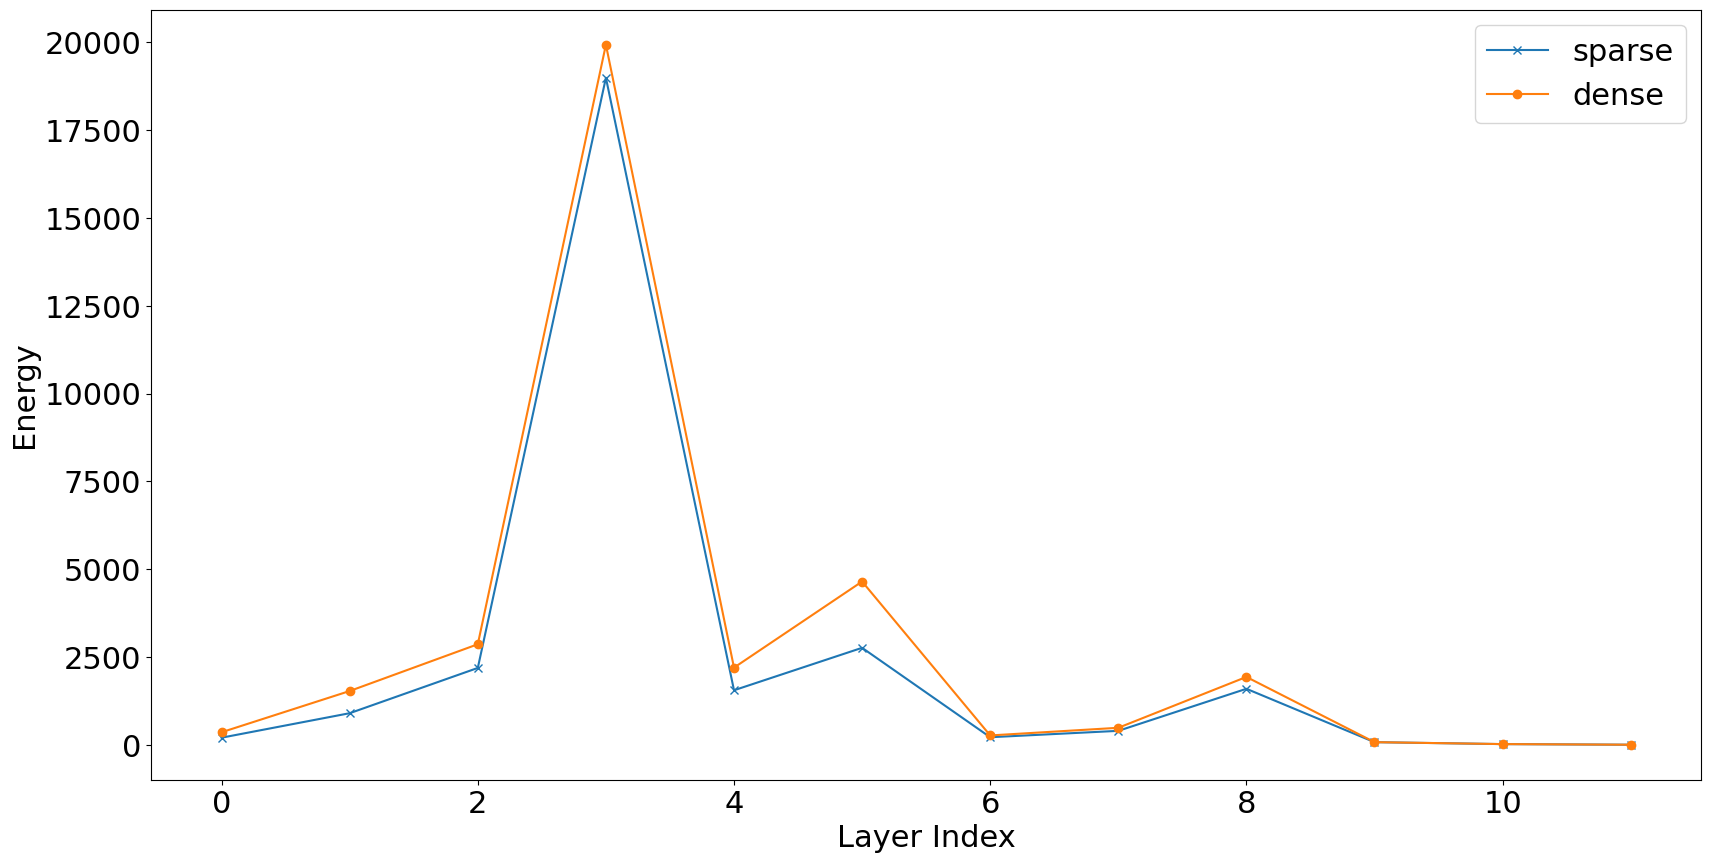

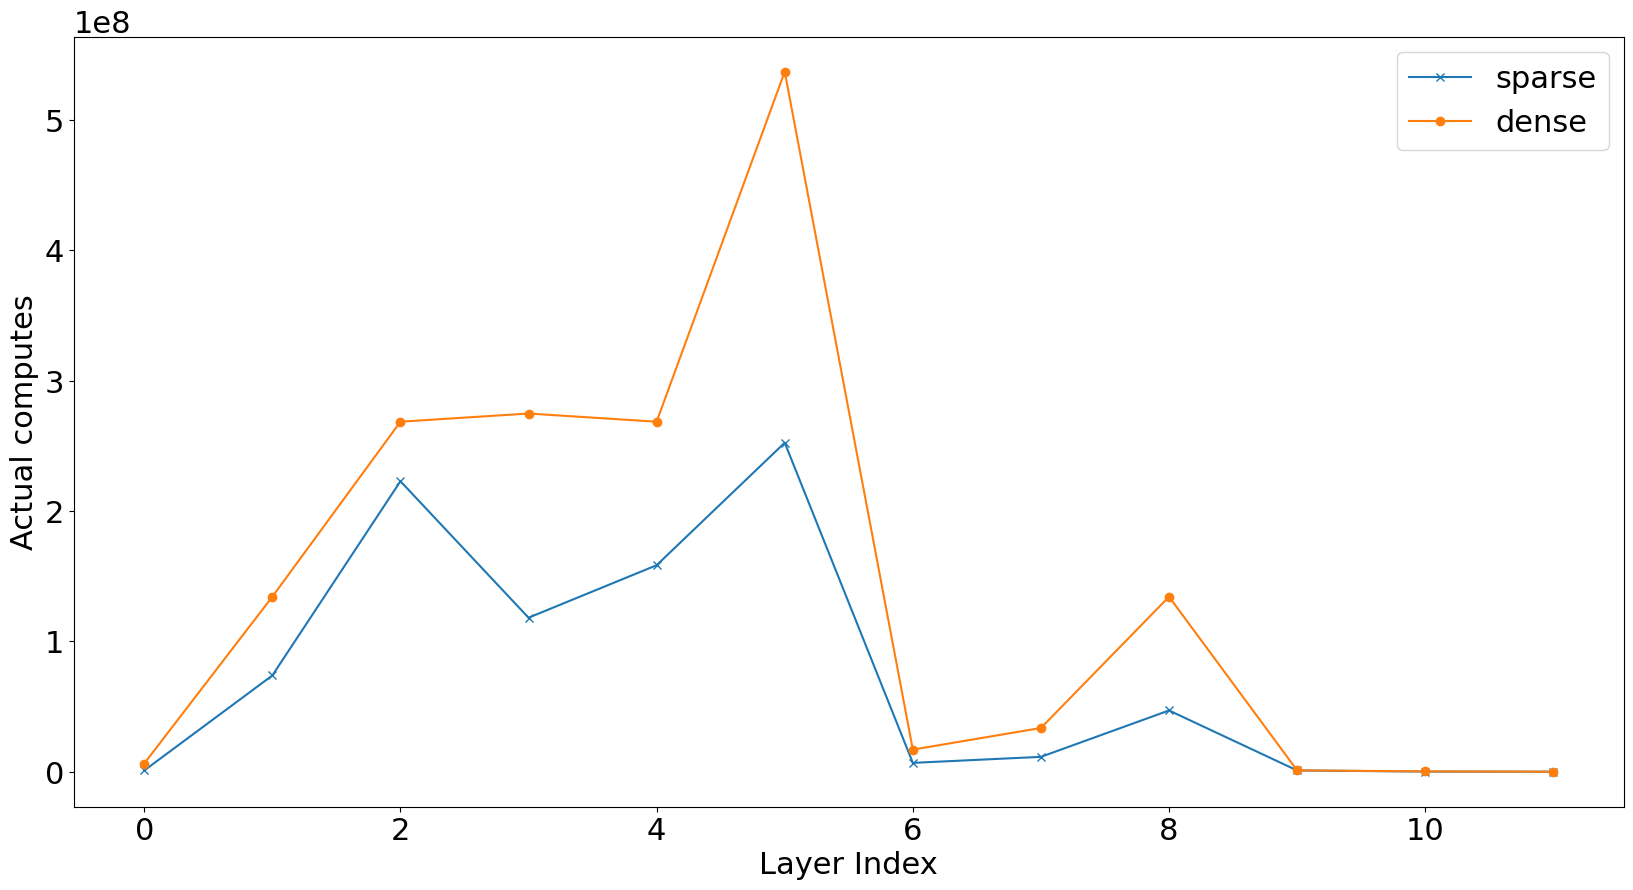

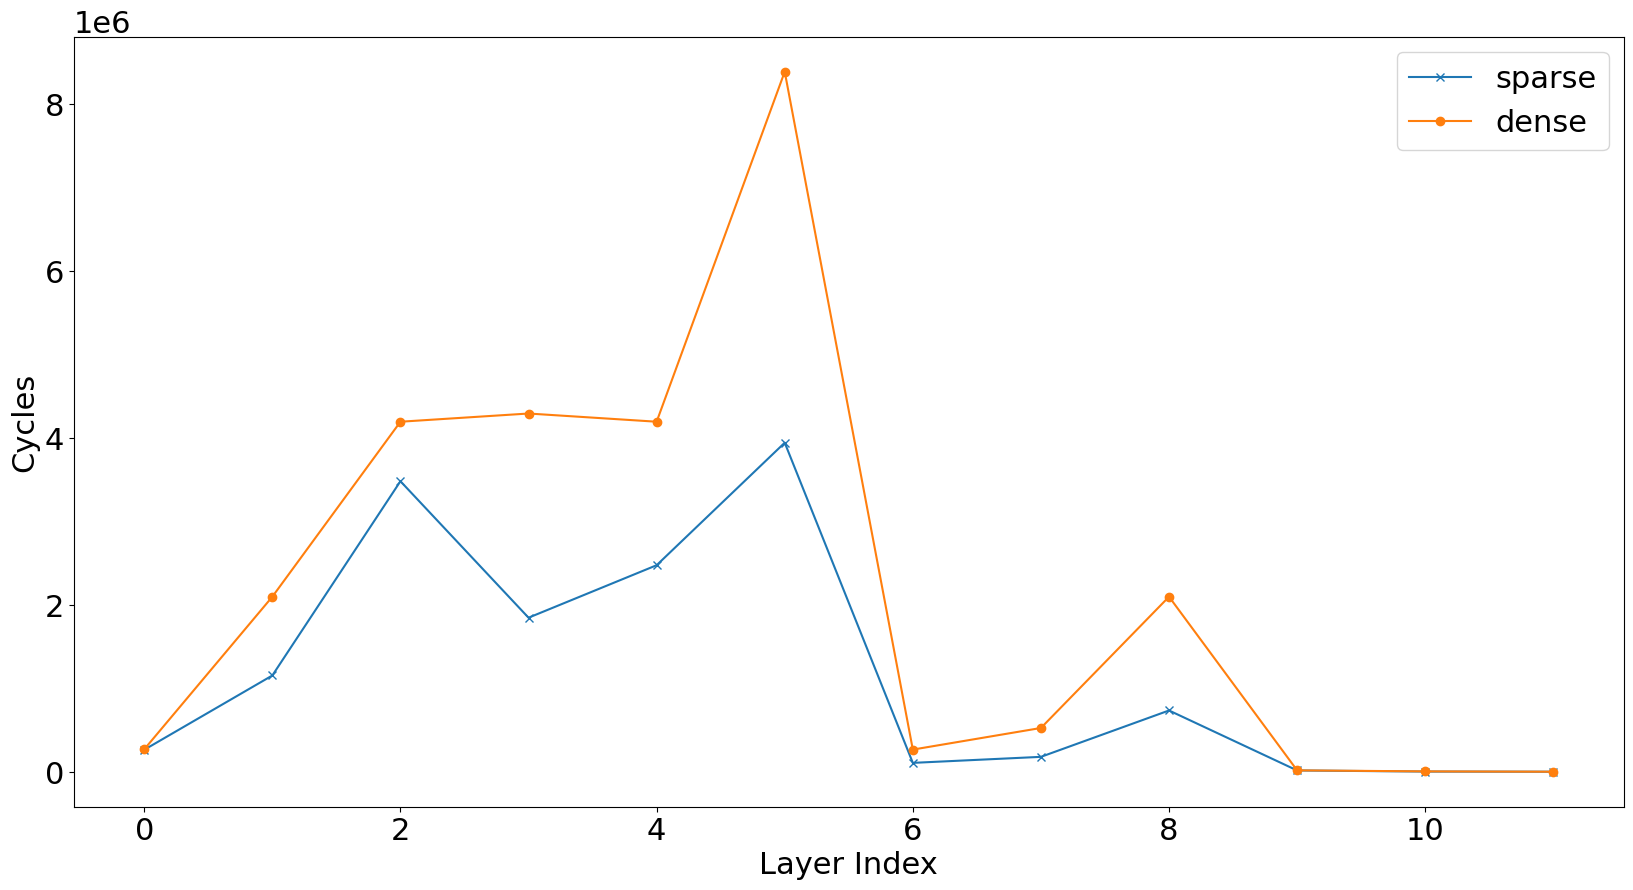

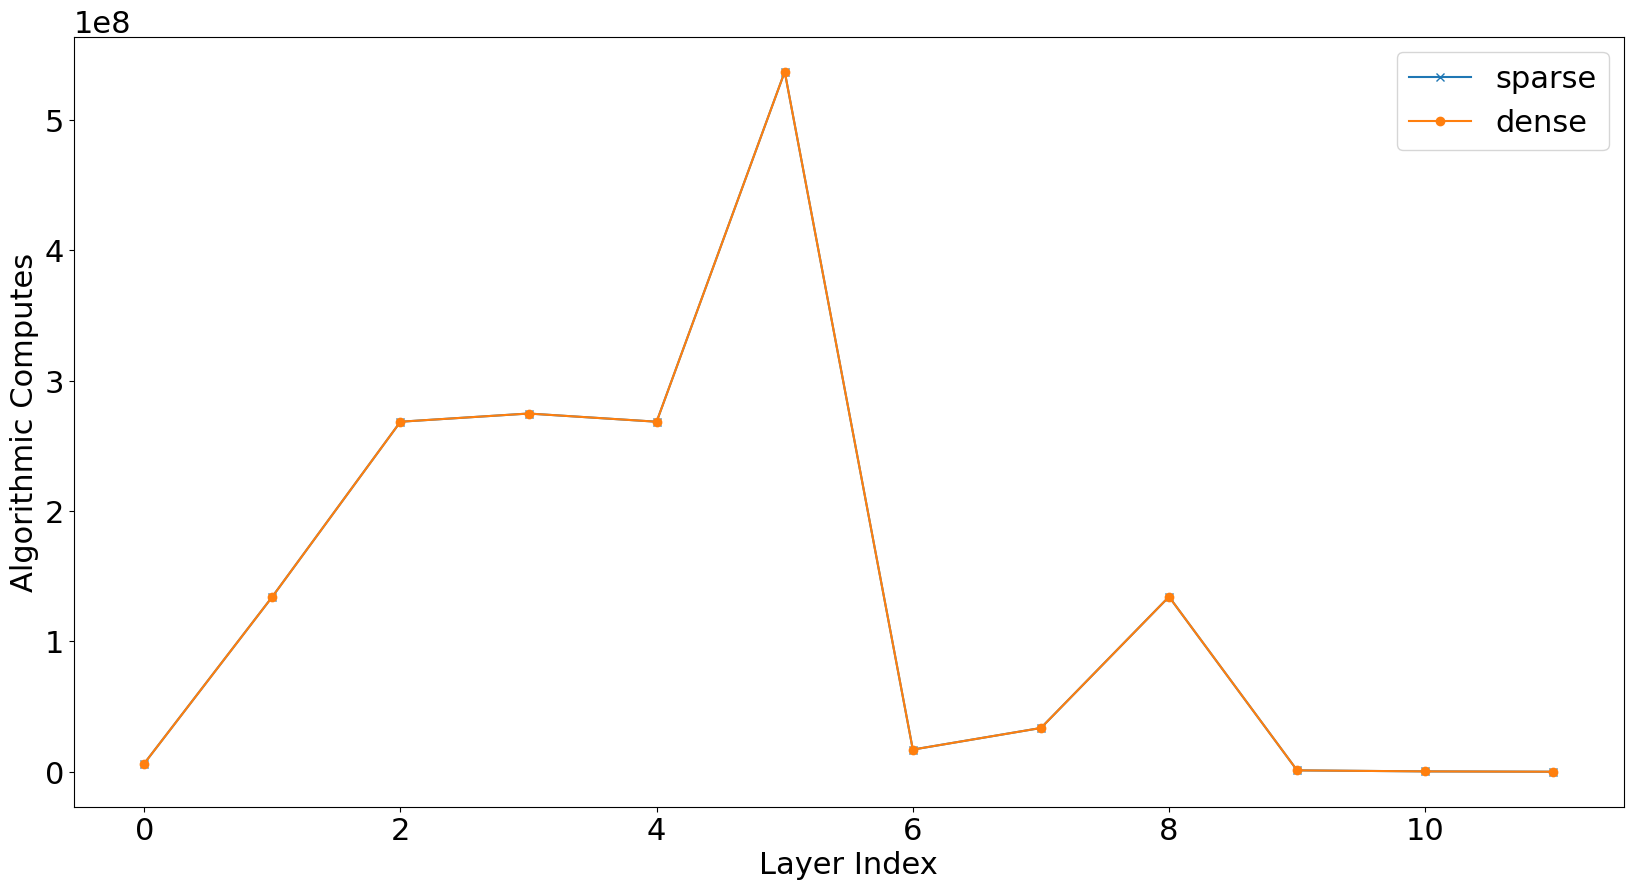

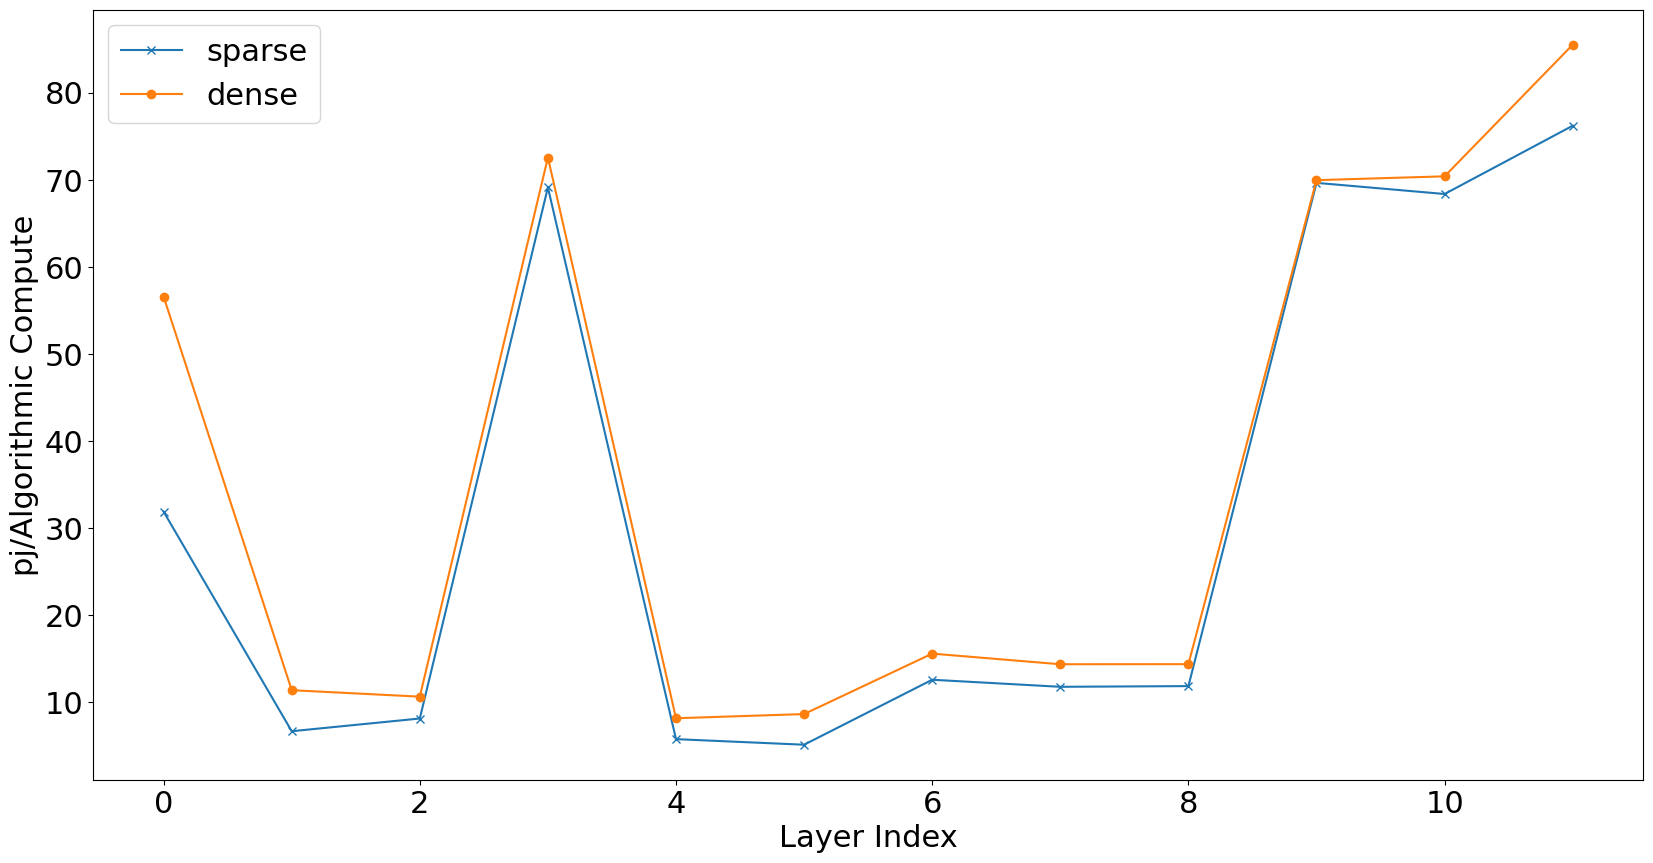

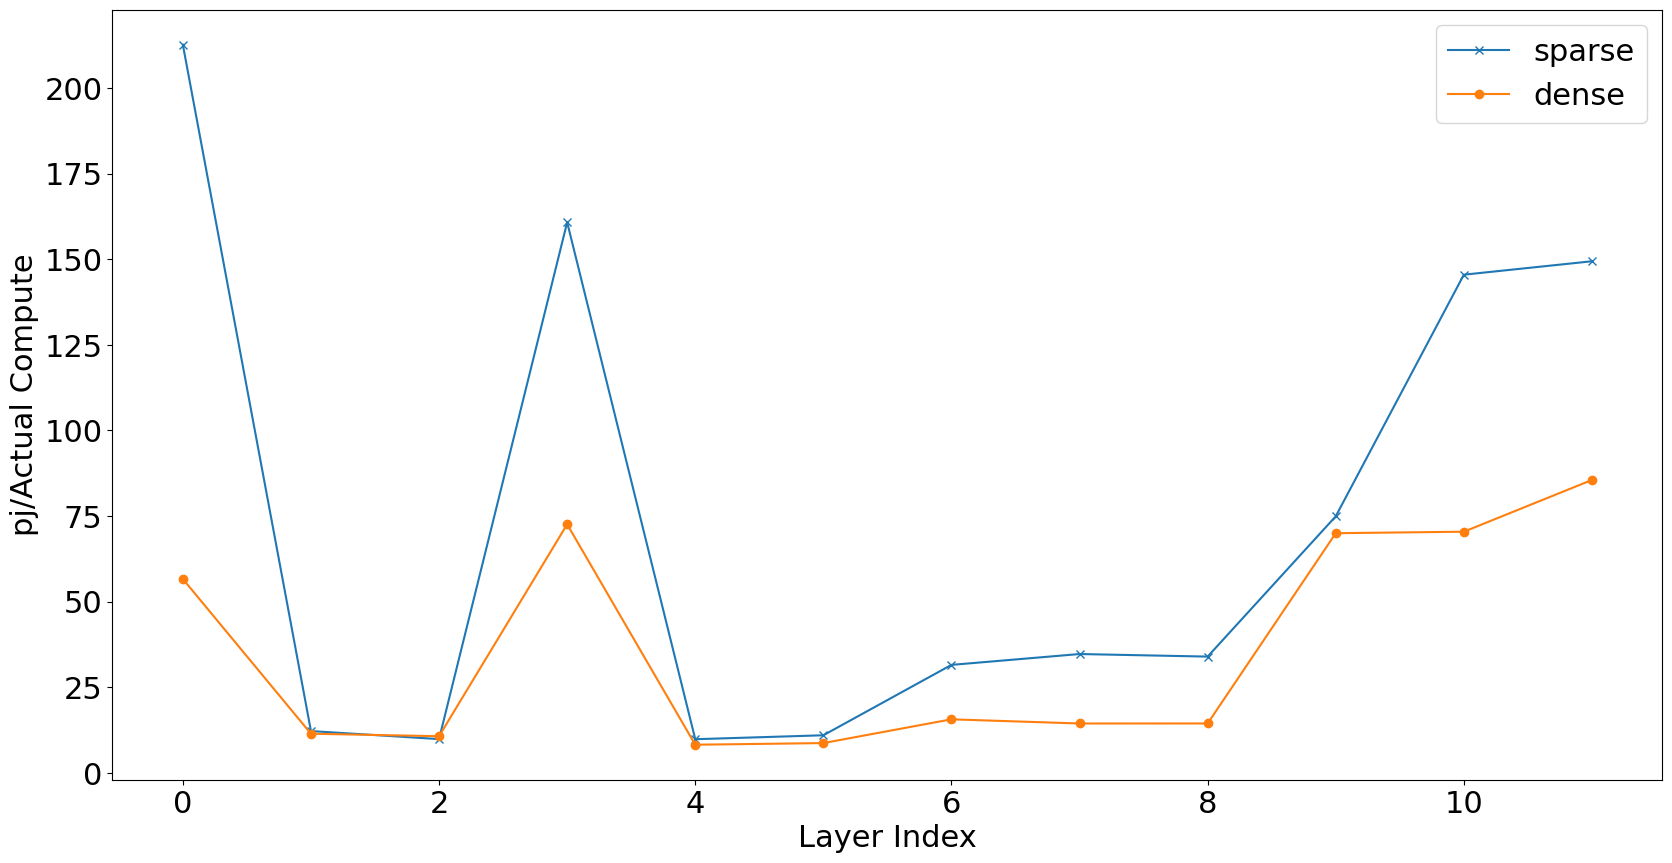

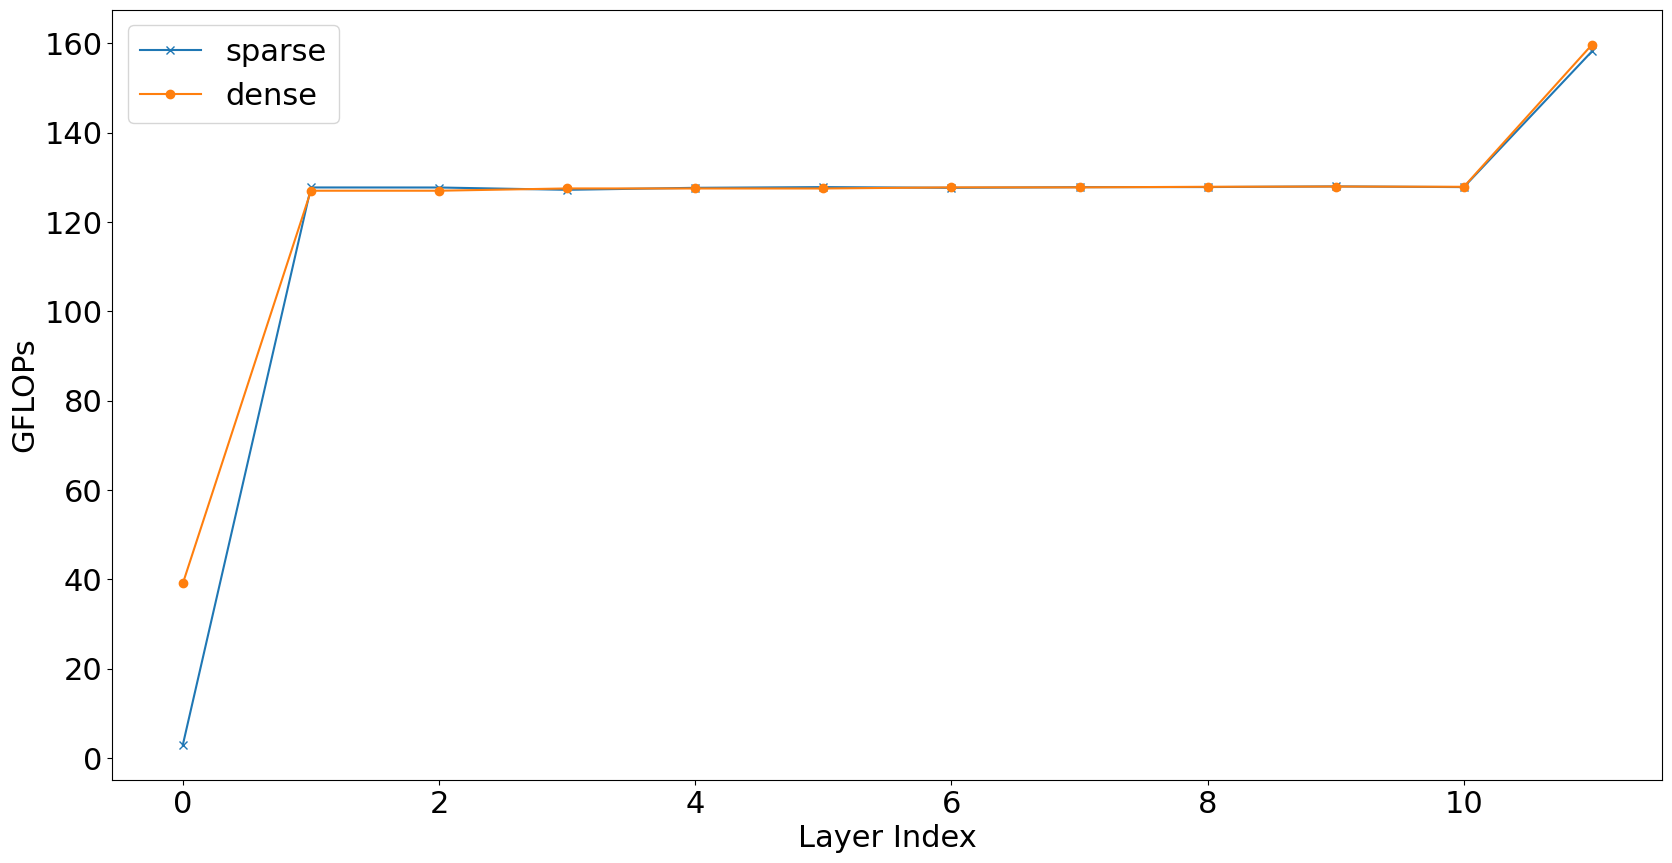

In [6]:
import matplotlib
elems = {
    "Energy": energy,
    "Actual computes": actual_computes,
    "Cycles":cycles,
#     "Actual Computes": actual_computes,
    "Algorithmic Computes": algorithmic_computes,
    "pj/Algorithmic Compute":pjs_algorithmic,
    "pj/Actual Compute":pjs_actual,
    "GFLOPs":gflops
}
for key in elems:
    arr = elems[key]
    plt.rcParams.update({'font.size': 22})
    plt.figure(figsize=(20,10))


    plt.plot(range(12), arr[:,0], marker = "x", label="sparse")
    plt.plot(range(12), arr[:,1], marker = "o", label="dense")

    plt.xlabel("Layer Index")
    plt.ylabel(key)


    plt.legend()

    if key.startswith("pj"):
        filename = "pj_{}".format(key.split("/")[-1])
    else:
        filename = key
    print(filename)
    plt.savefig("{}/{}.pdf".format(plot_folder,filename), dpi=200)

In [7]:
sparse_df = pd.read_csv("Layer-wise-sparsities.csv")

In [8]:
weight_density = sparse_df['Weight Density']

In [9]:
sparse_df

,Layer,Weight Sparsity,Input Sparsity,Output Sparsity,Weight Density,Input Density,Output Density,Layer Number
0,sa1.mlp_convs.0,0.218750,0.848712,0.473462,0.781250,0.151288,0.526538,1
1,sa1.mlp_convs.1,0.482666,0.446112,0.850767,0.517334,0.553888,0.149233,2
2,sa1.mlp_convs.2,0.515259,0.173860,0.768136,0.484741,0.826140,0.231864,3
3,sa2.mlp_convs.0,0.650286,0.573100,0.300164,0.349714,0.426900,0.699836,4
4,sa2.mlp_convs.1,0.629211,0.412164,0.588279,0.370789,0.587836,0.411721,5
5,sa2.mlp_convs.2,0.618896,0.534936,0.815716,0.381104,0.465064,0.184284,6
6,sa3.mlp_convs.0,0.800072,0.600321,0.442379,0.199928,0.399679,0.557621,7
7,sa3.mlp_convs.1,0.850410,0.660388,0.706345,0.149590,0.339612,0.293655,8
8,sa3.mlp_convs.2,0.952623,0.646280,0.485509,0.047377,0.353720,0.514491,9
9,fc1,0.940741,0.072144,0.521403,0.059259,0.927856,0.478597,10


In [11]:
energy_ratio = energy[:,0]/energy[:,1]
gflops_ratio = gflops[:,0]/gflops[:,1]
cycles_ratio = cycles[:,0]/cycles[:,1]
actual_computes_ratio = actual_computes[:,0]/actual_computes[:,1]
algorithmic_computes_ratio = algorithmic_computes[:,0]/algorithmic_computes[:,1]
pjs_algorithmic_ratio = pjs_algorithmic[:,0]/pjs_algorithmic[:,1]
pjs_actual_ratio = pjs_actual[:,0]/pjs_actual[:,1]

Energy Ratio
Actual Computes Ratio
Cycles Ratio
Algorithmic Computes Ratio
pj_Algorithmic Compute Ratio
pj_Actual Compute Ratio
GFLOPs


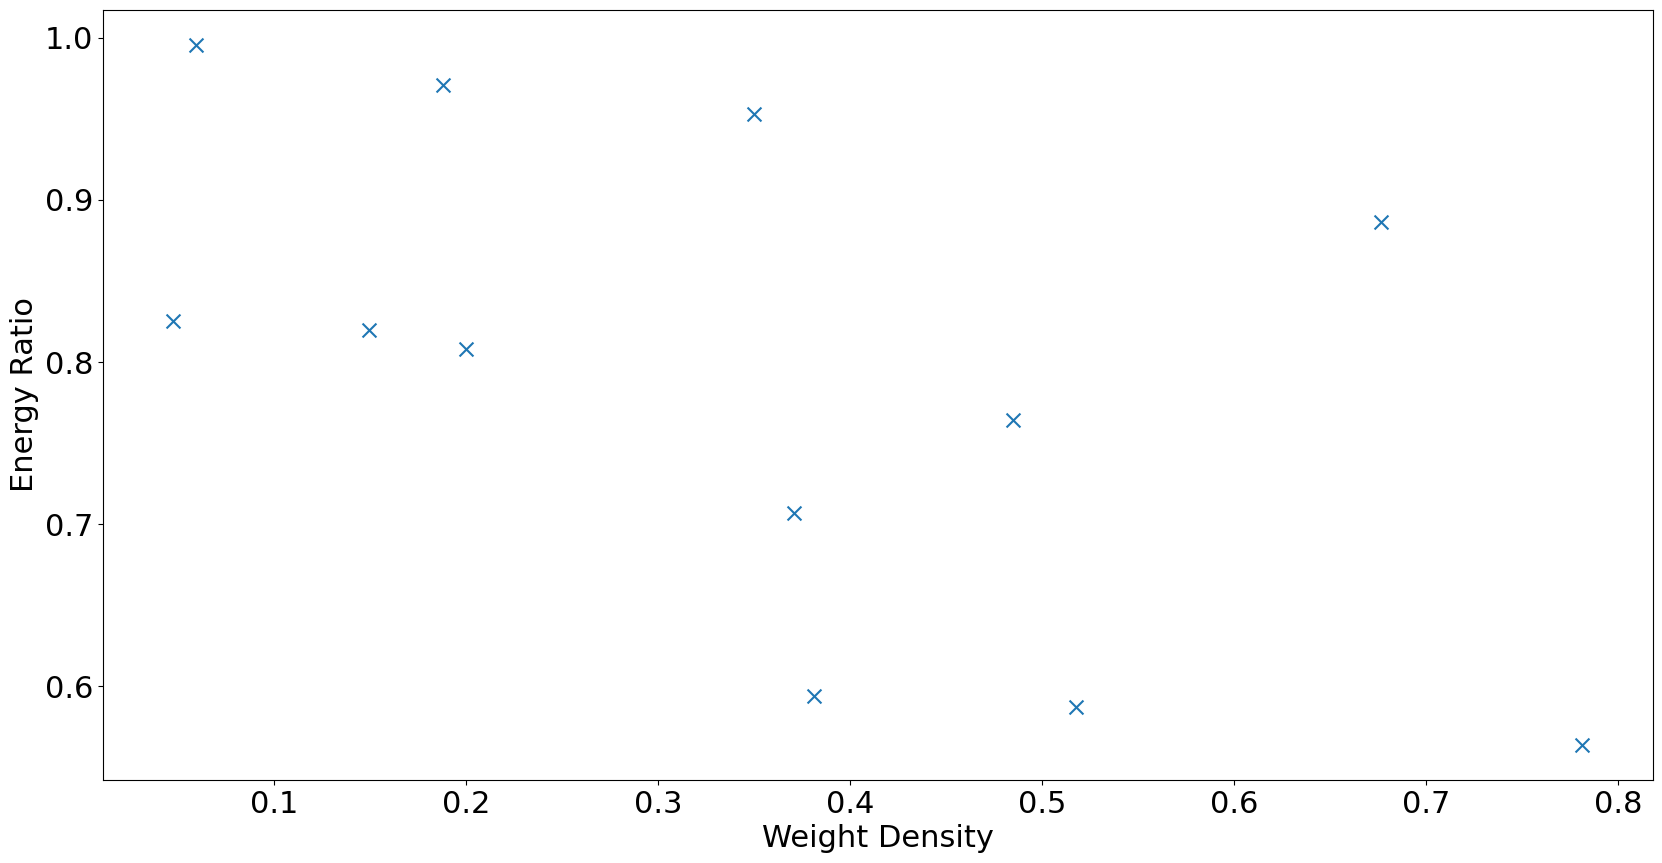

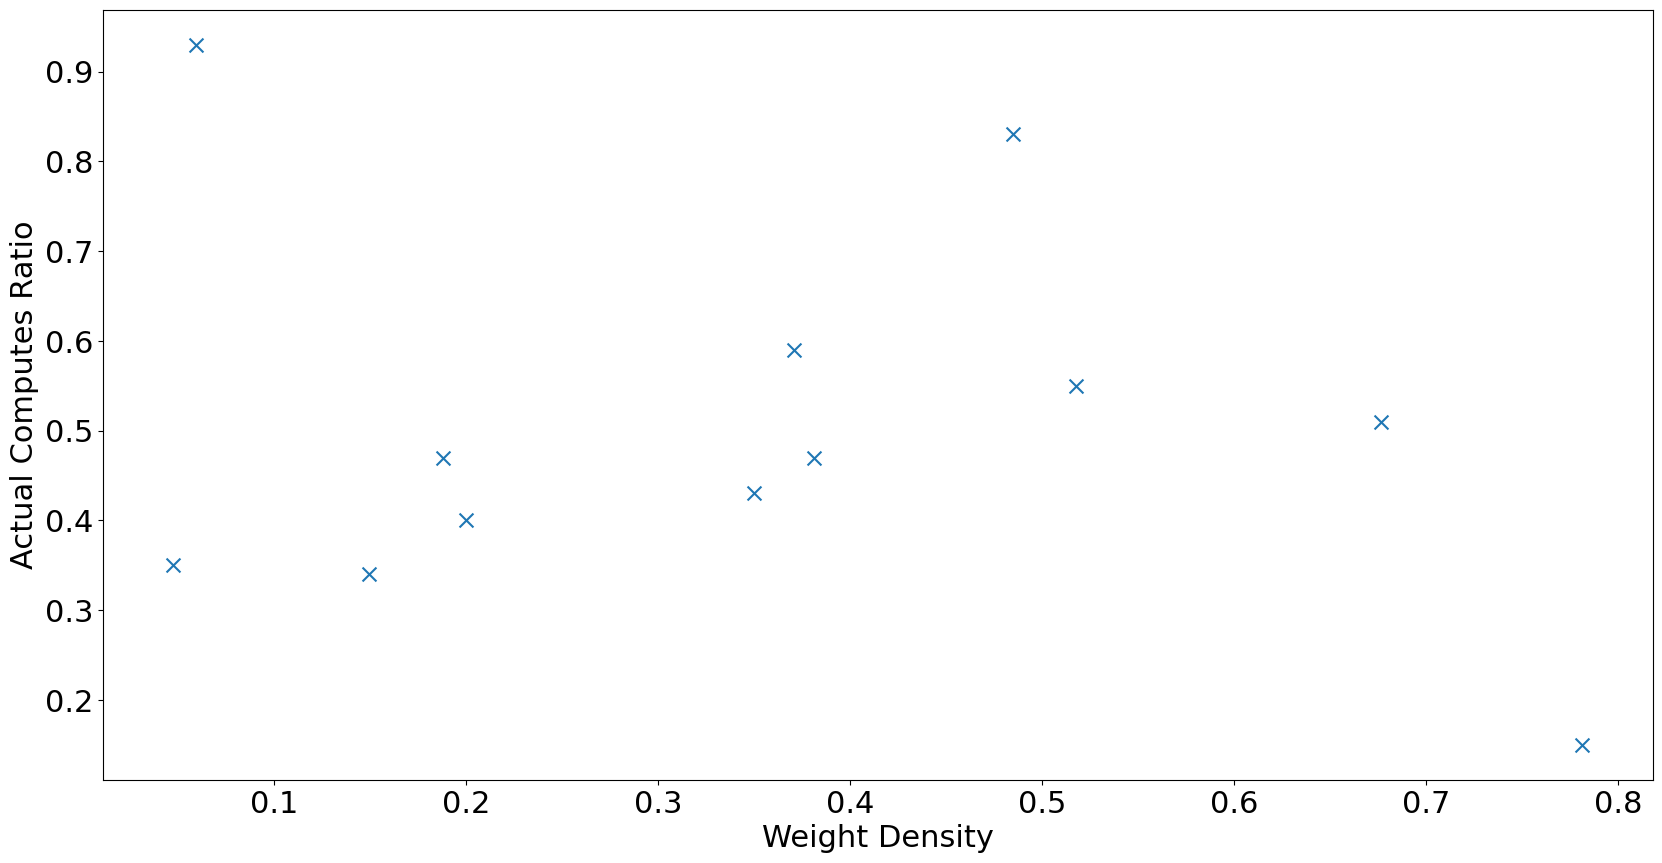

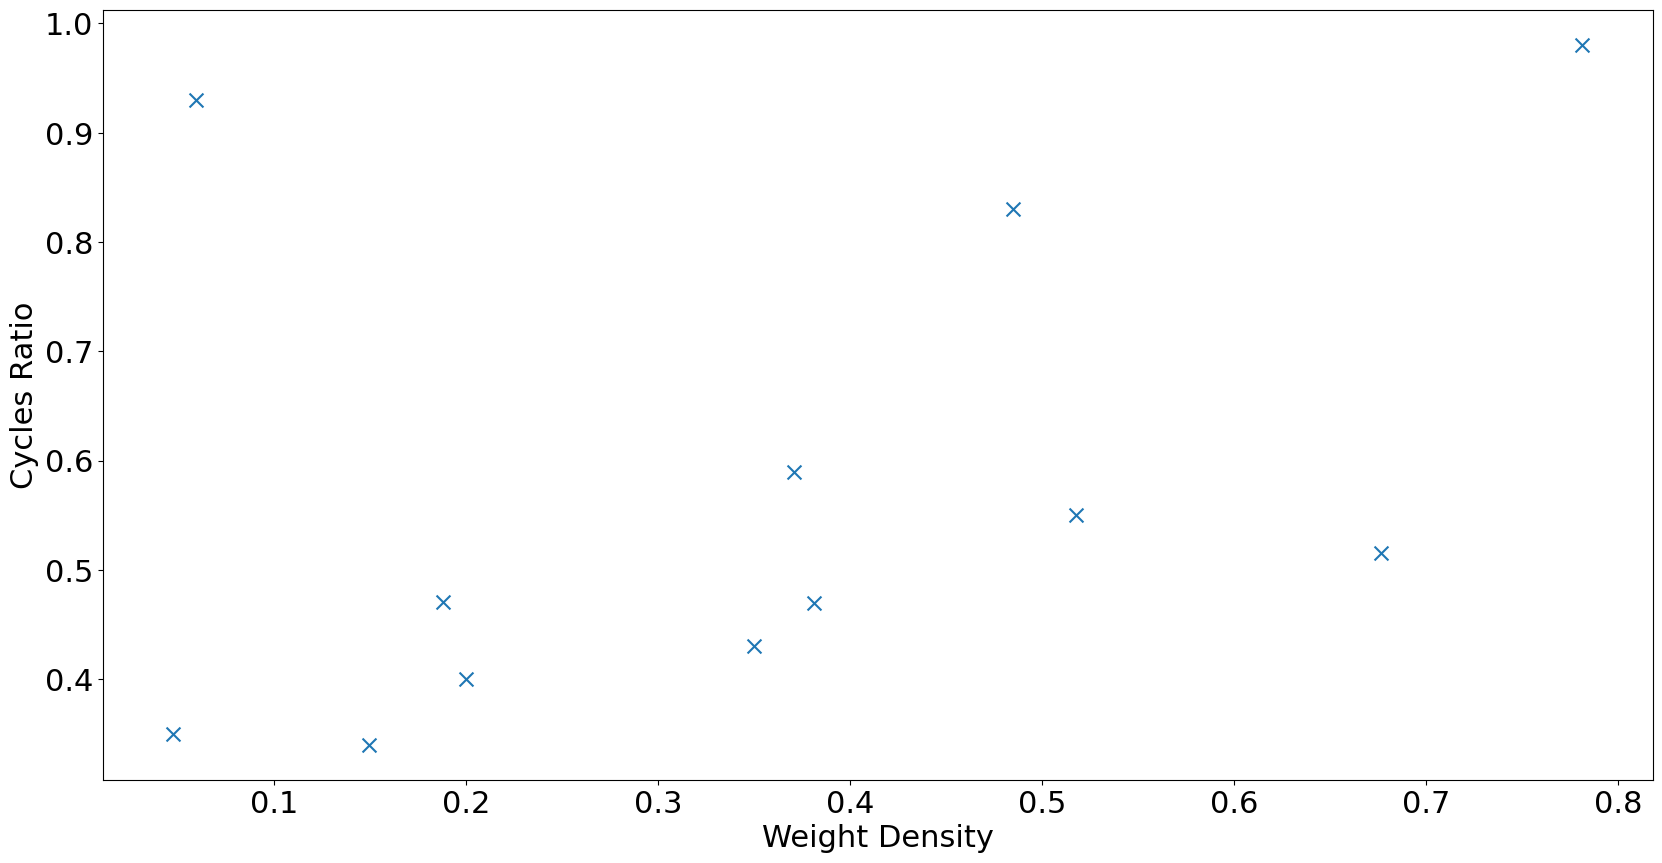

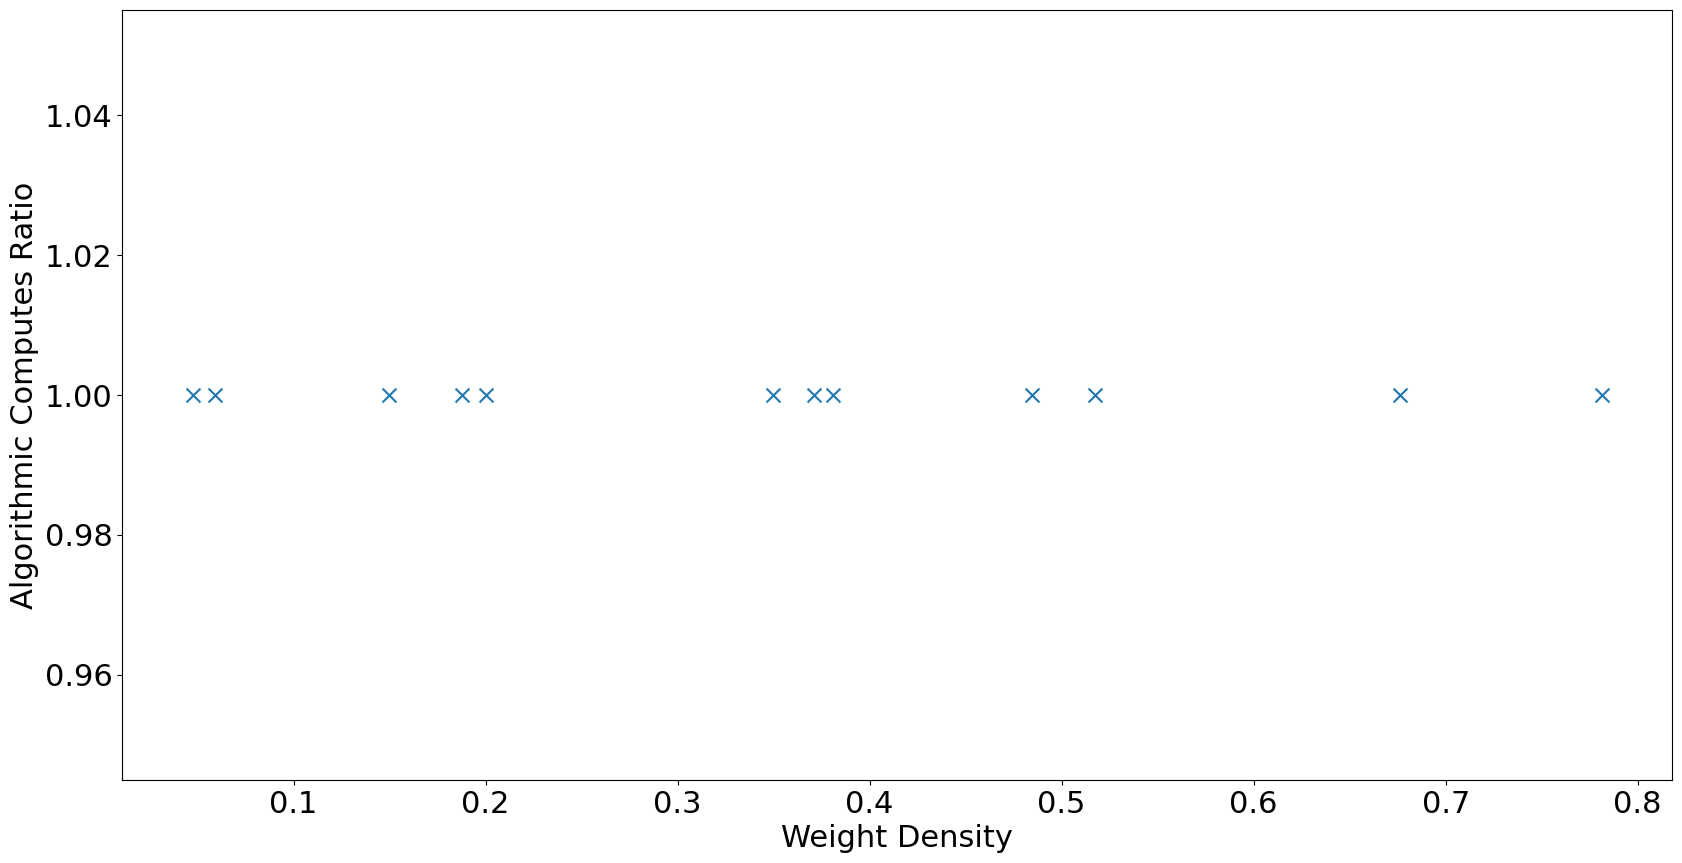

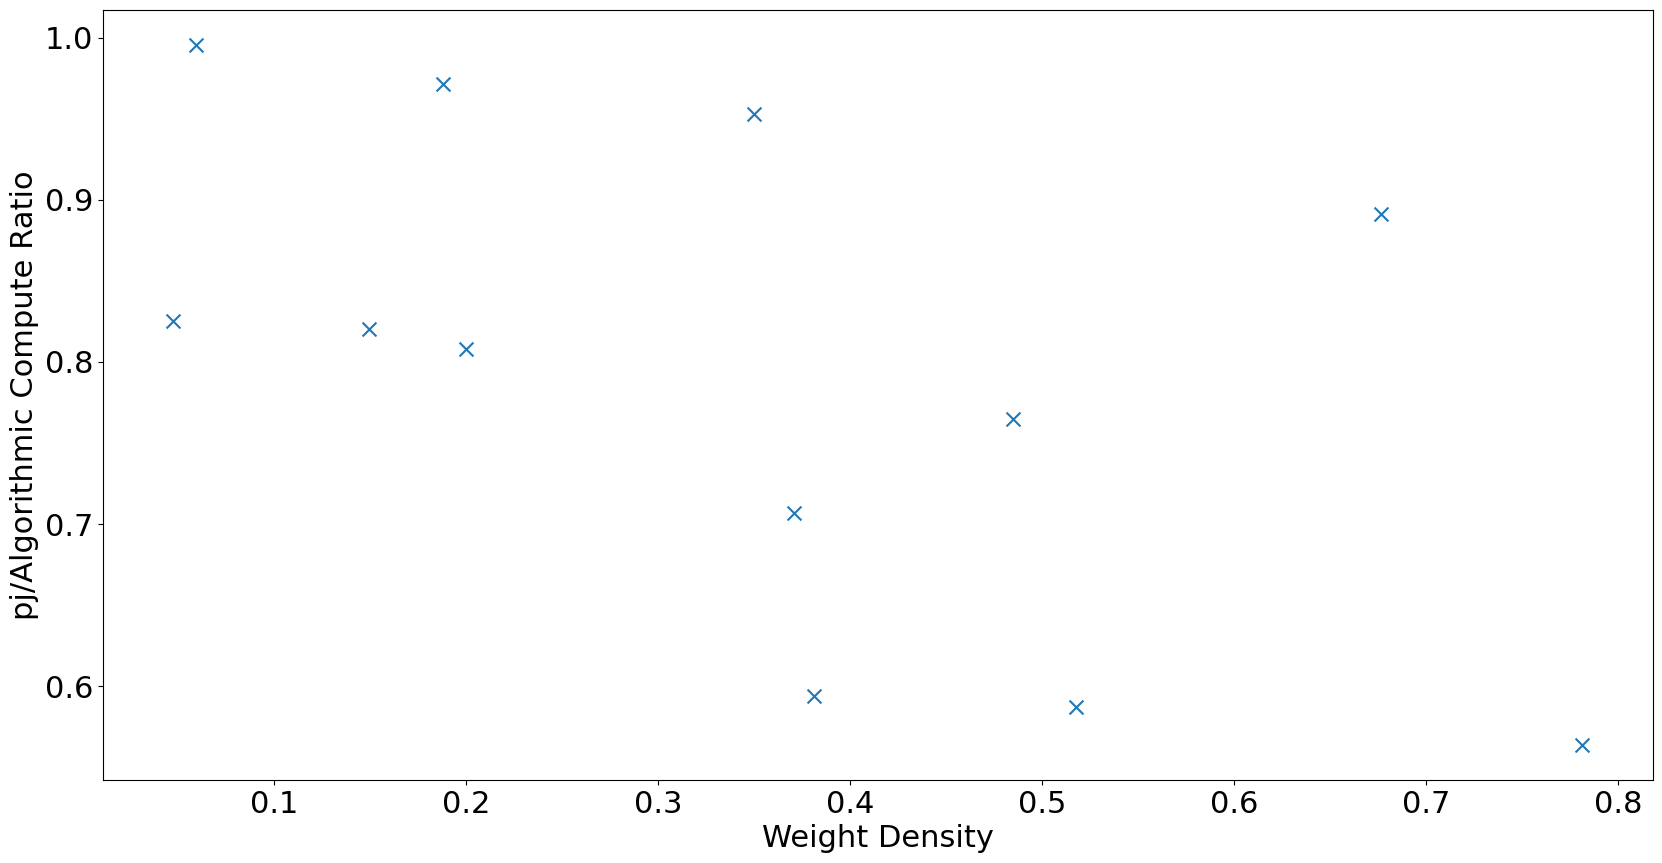

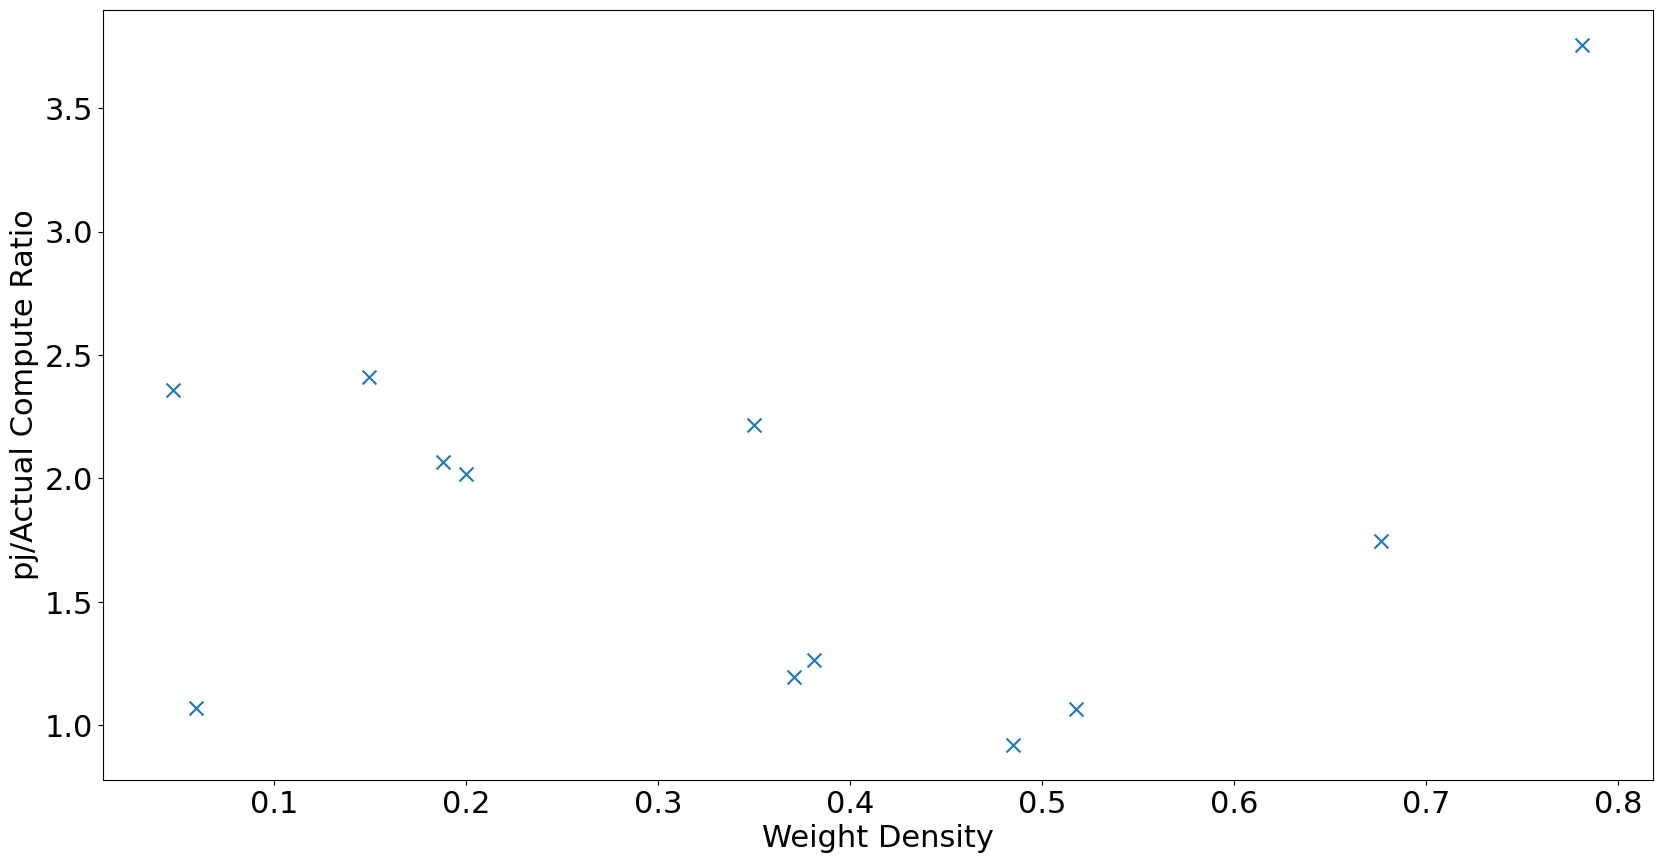

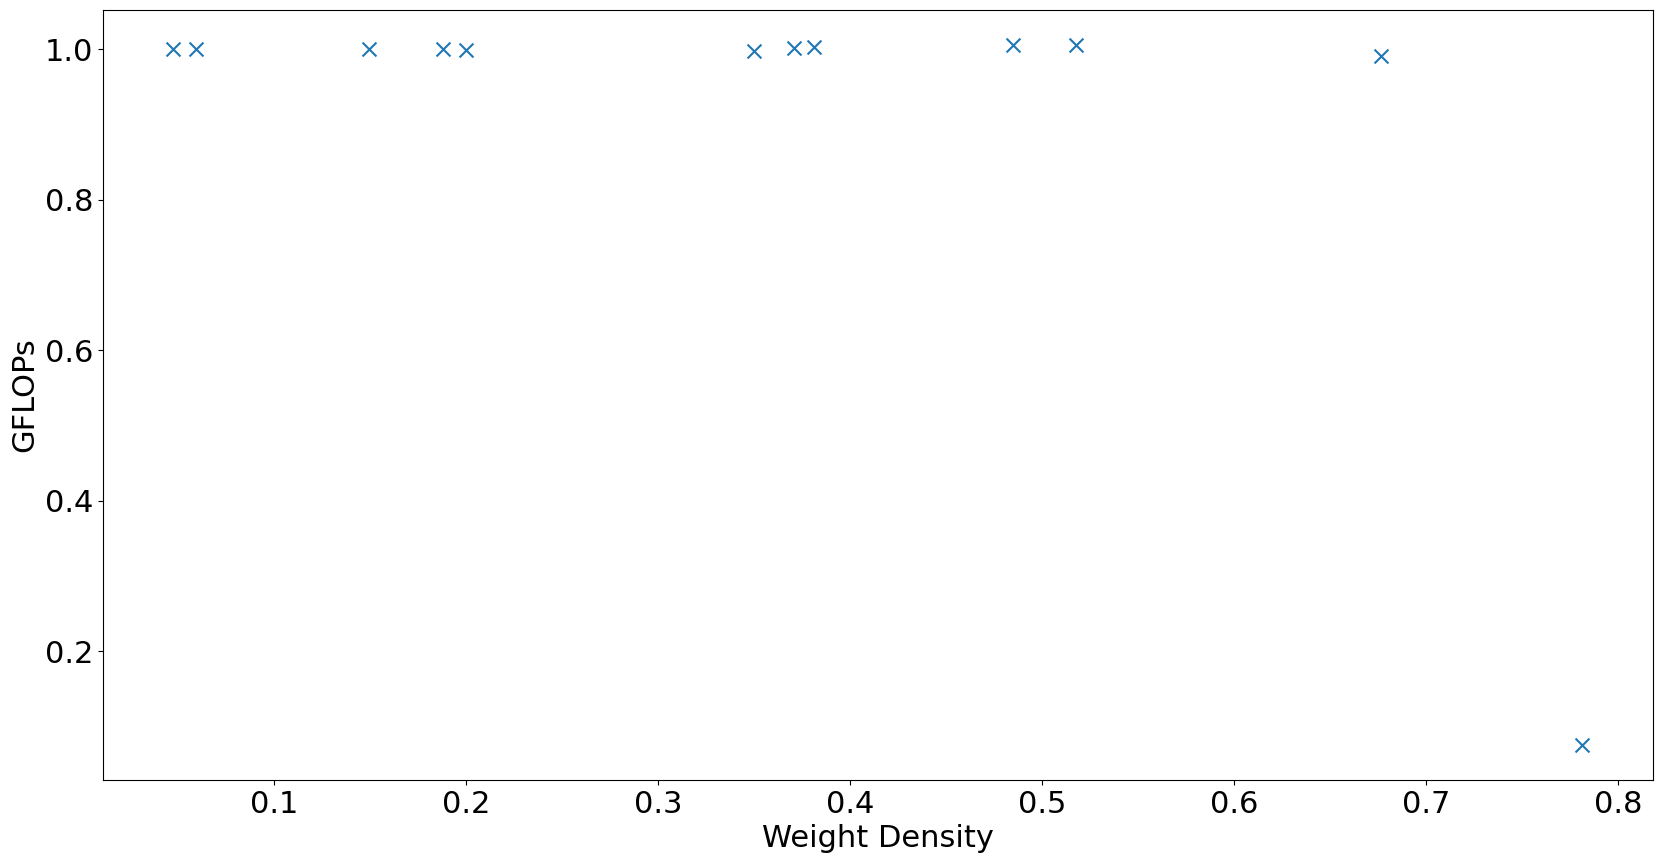

In [12]:
elems = {
    "Energy Ratio": energy_ratio,
    "Actual Computes Ratio": actual_computes_ratio,
    "Cycles Ratio":cycles_ratio,
#     "Actual Computes": actual_computes,
    "Algorithmic Computes Ratio": algorithmic_computes_ratio,
    "pj/Algorithmic Compute Ratio":pjs_algorithmic_ratio,
    "pj/Actual Compute Ratio":pjs_actual_ratio,
    "GFLOPs":gflops_ratio
}
for key in elems:
    arr = elems[key]
    plt.figure(figsize=(20,10))
    plt.scatter(list(weight_density), arr, marker = "x", s=100)
    # plt.plot(range(11), cycles[:,1], marker = "o", label="dense")

    plt.xlabel("Weight Density")
    plt.ylabel(key)
#     plt.ylabel("pJs Ratio")
    
    if key.startswith("pj"):
        filename = "pj_{}".format(key.split("/")[-1])
    else:
        filename = key
    print(filename)

    # plt.legend()
    plt.savefig("{}/{}.pdf".format(plot_folder,filename))

In [22]:
len(energy_ratio)

11

In [16]:
sparse_energy_normalized = energy[:,0]/energy[:,1]
sparse_energy_normalized = sparse_energy_normalized.reshape(-1,1)
energ = np.hstack((energy,sparse_energy_normalized))
energ

array([[1.92850000e+02, 3.45110000e+02, 5.58807337e-01],
       [8.06660000e+02, 1.33109000e+03, 6.06014620e-01],
       [1.80642000e+03, 2.44370000e+03, 7.39215125e-01],
       [1.87473100e+04, 1.94392800e+04, 9.64403517e-01],
       [1.22014000e+03, 1.80828000e+03, 6.74751698e-01],
       [2.26325000e+03, 3.81456000e+03, 5.93318758e-01],
       [2.01770000e+02, 2.40130000e+02, 8.40253196e-01],
       [3.82500000e+02, 4.64270000e+02, 8.23874039e-01],
       [1.46504000e+03, 1.74579000e+03, 8.39184553e-01],
       [7.16700000e+01, 7.19700000e+01, 9.95831596e-01],
       [1.76300000e+01, 1.81400000e+01, 9.71885336e-01],
       [3.90000000e-01, 4.30000000e-01, 9.06976744e-01]])

Normalized Energy
Normalized Actual computes
Normalized Cycles
Normalized Algorithmic Computes
Normalized pj_Algorithmic Compute
Normalized pj_Actual Compute
Normalized GFLOPs


<Figure size 4000x2000 with 0 Axes>

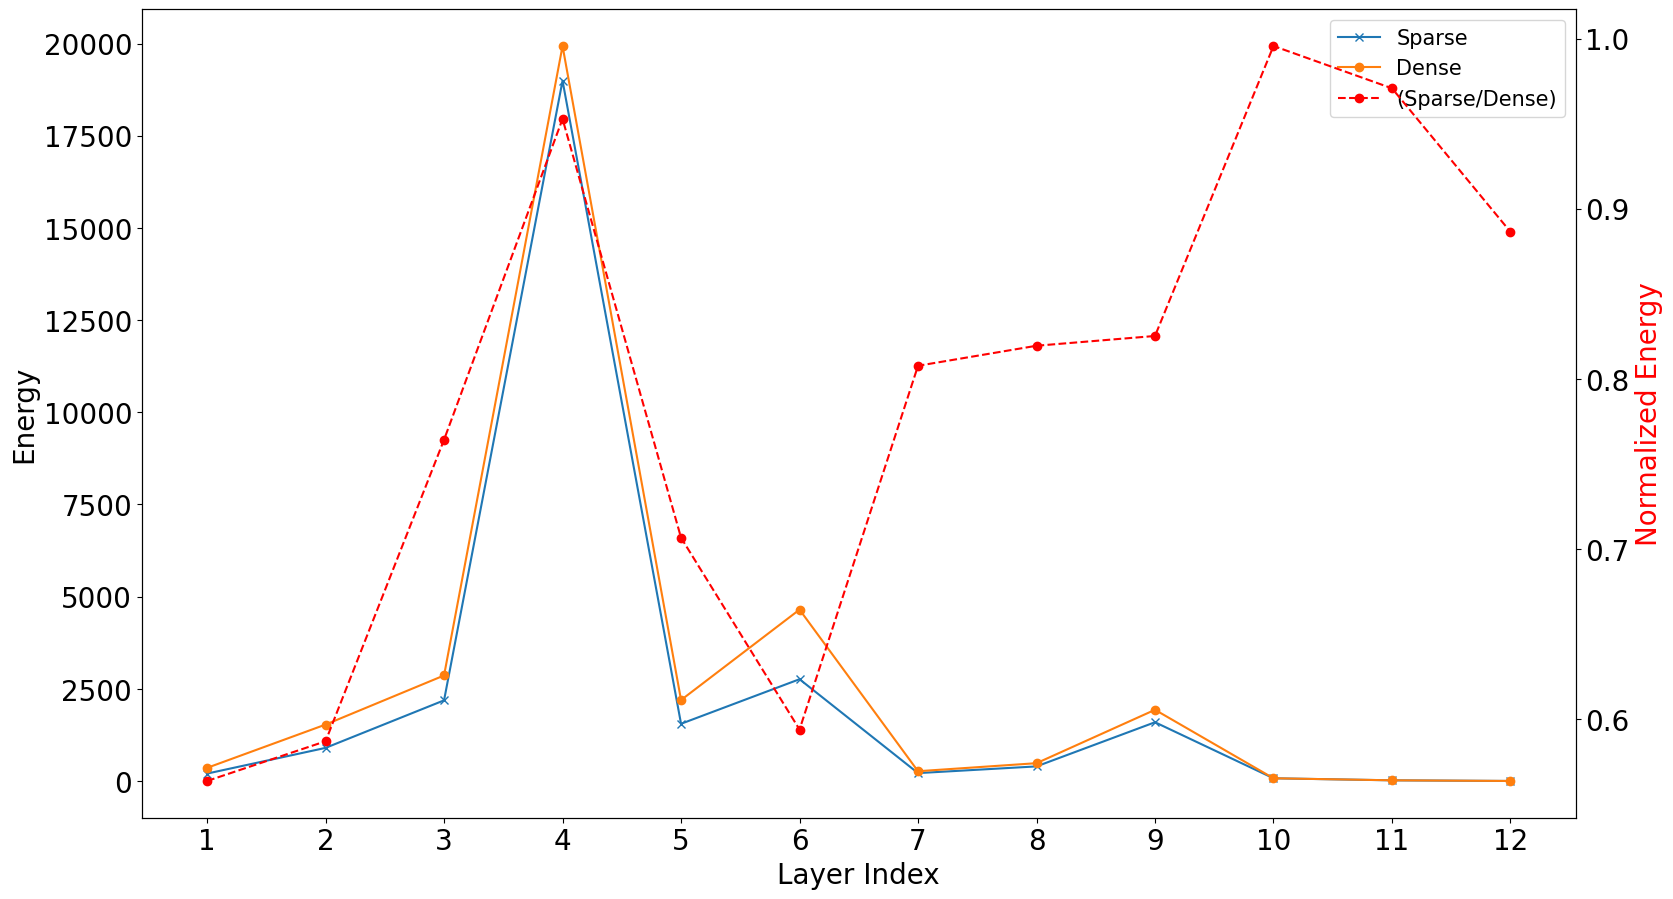

<Figure size 4000x2000 with 0 Axes>

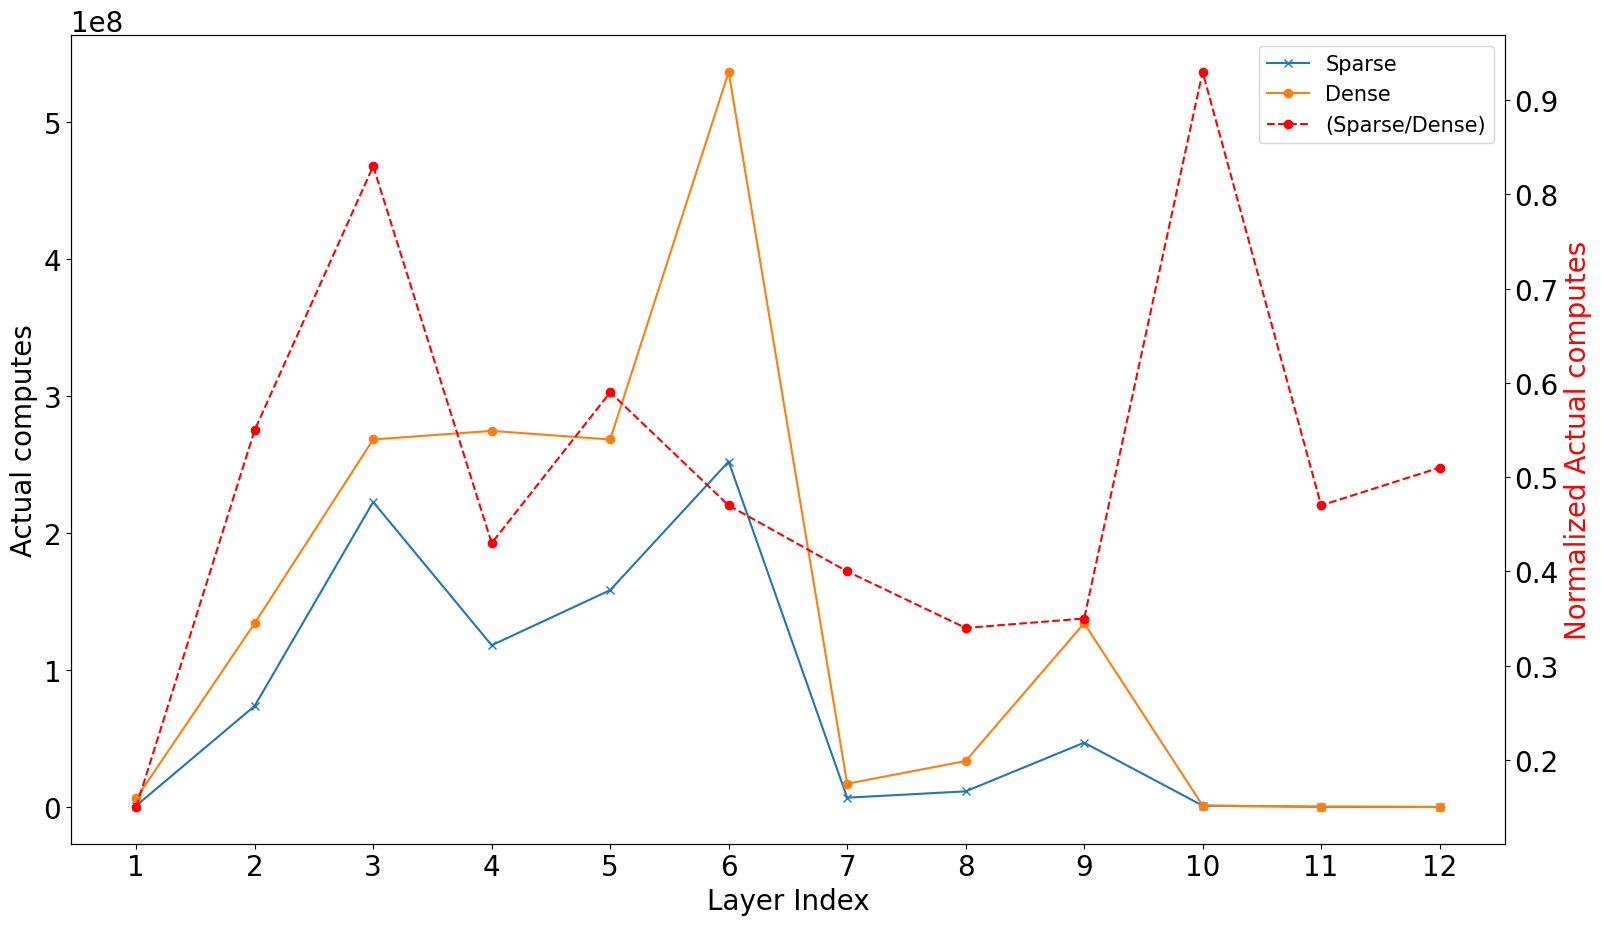

<Figure size 4000x2000 with 0 Axes>

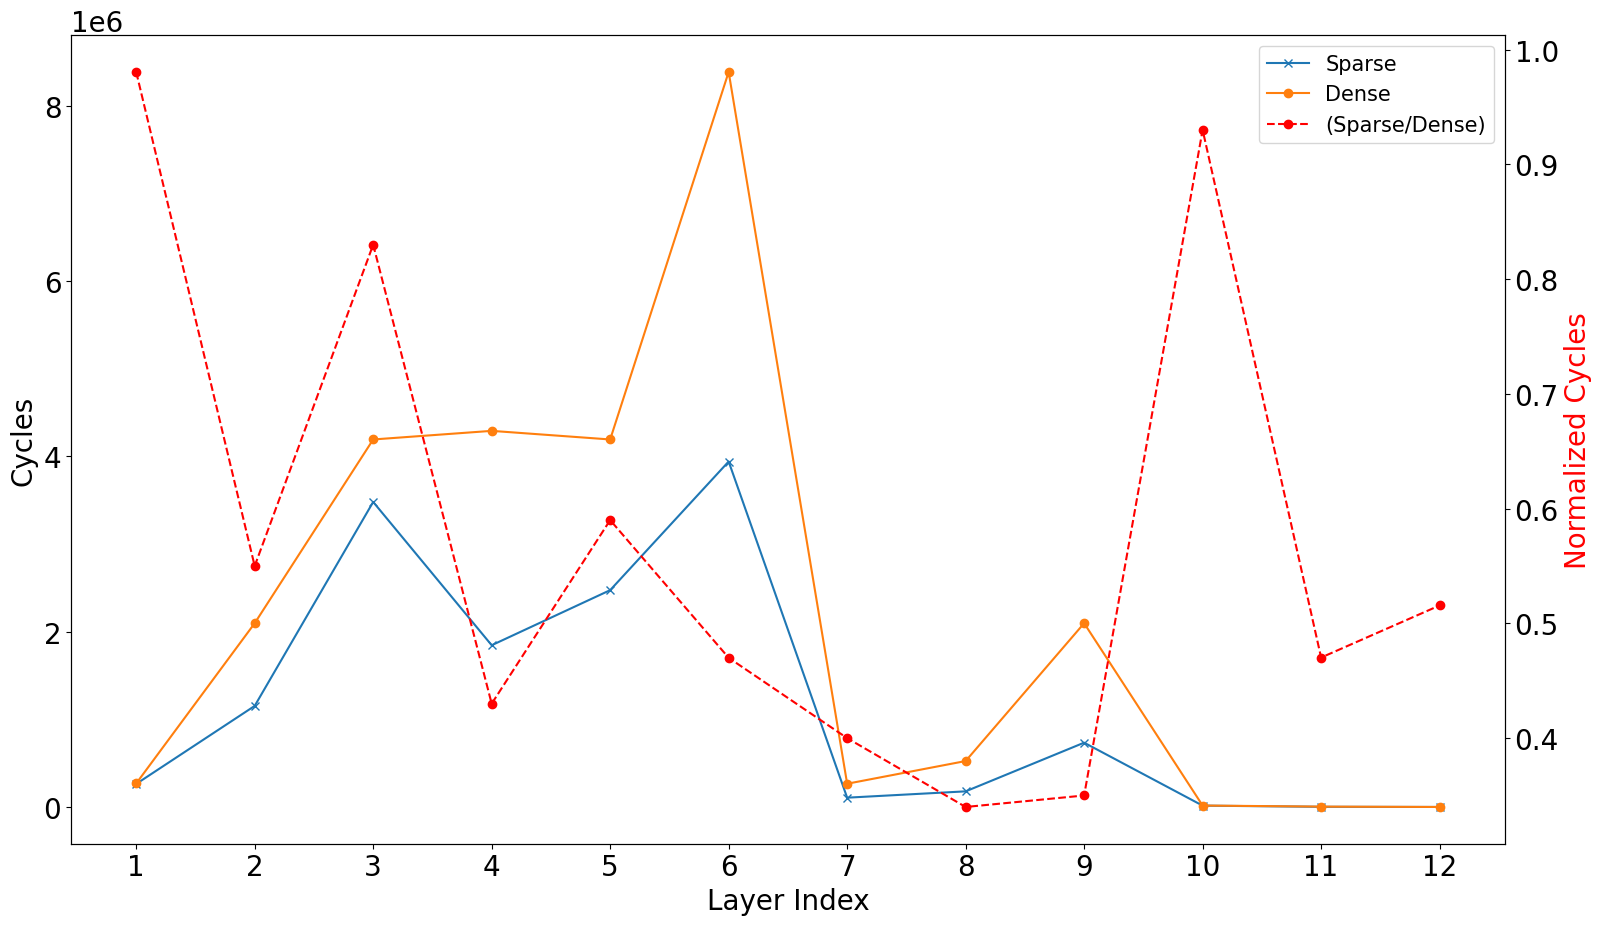

<Figure size 4000x2000 with 0 Axes>

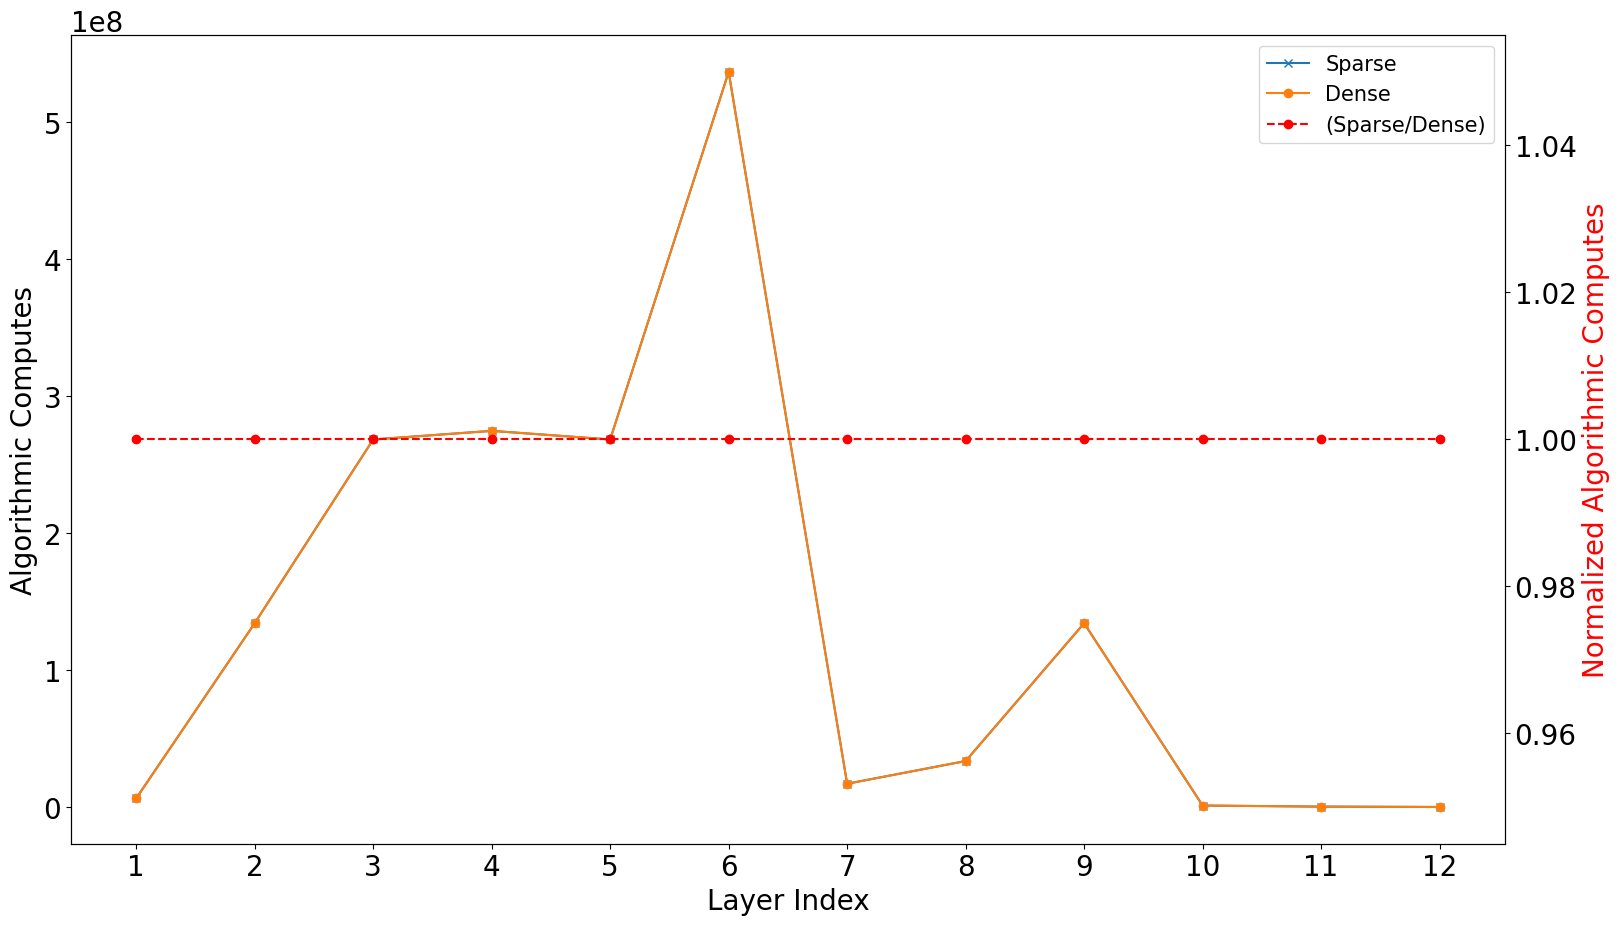

<Figure size 4000x2000 with 0 Axes>

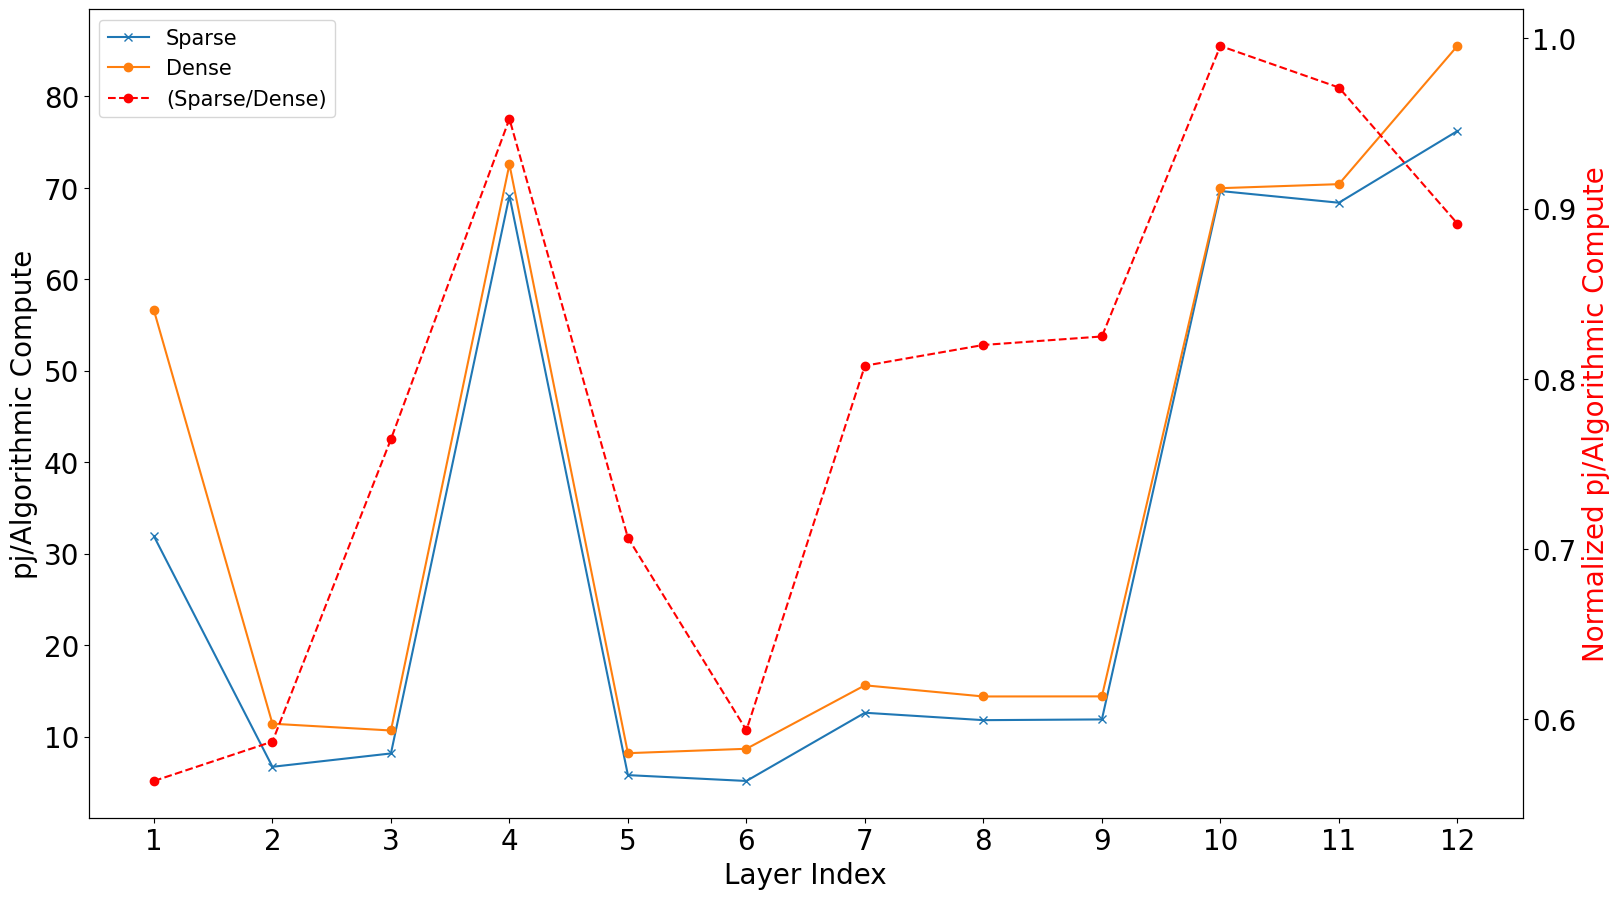

<Figure size 4000x2000 with 0 Axes>

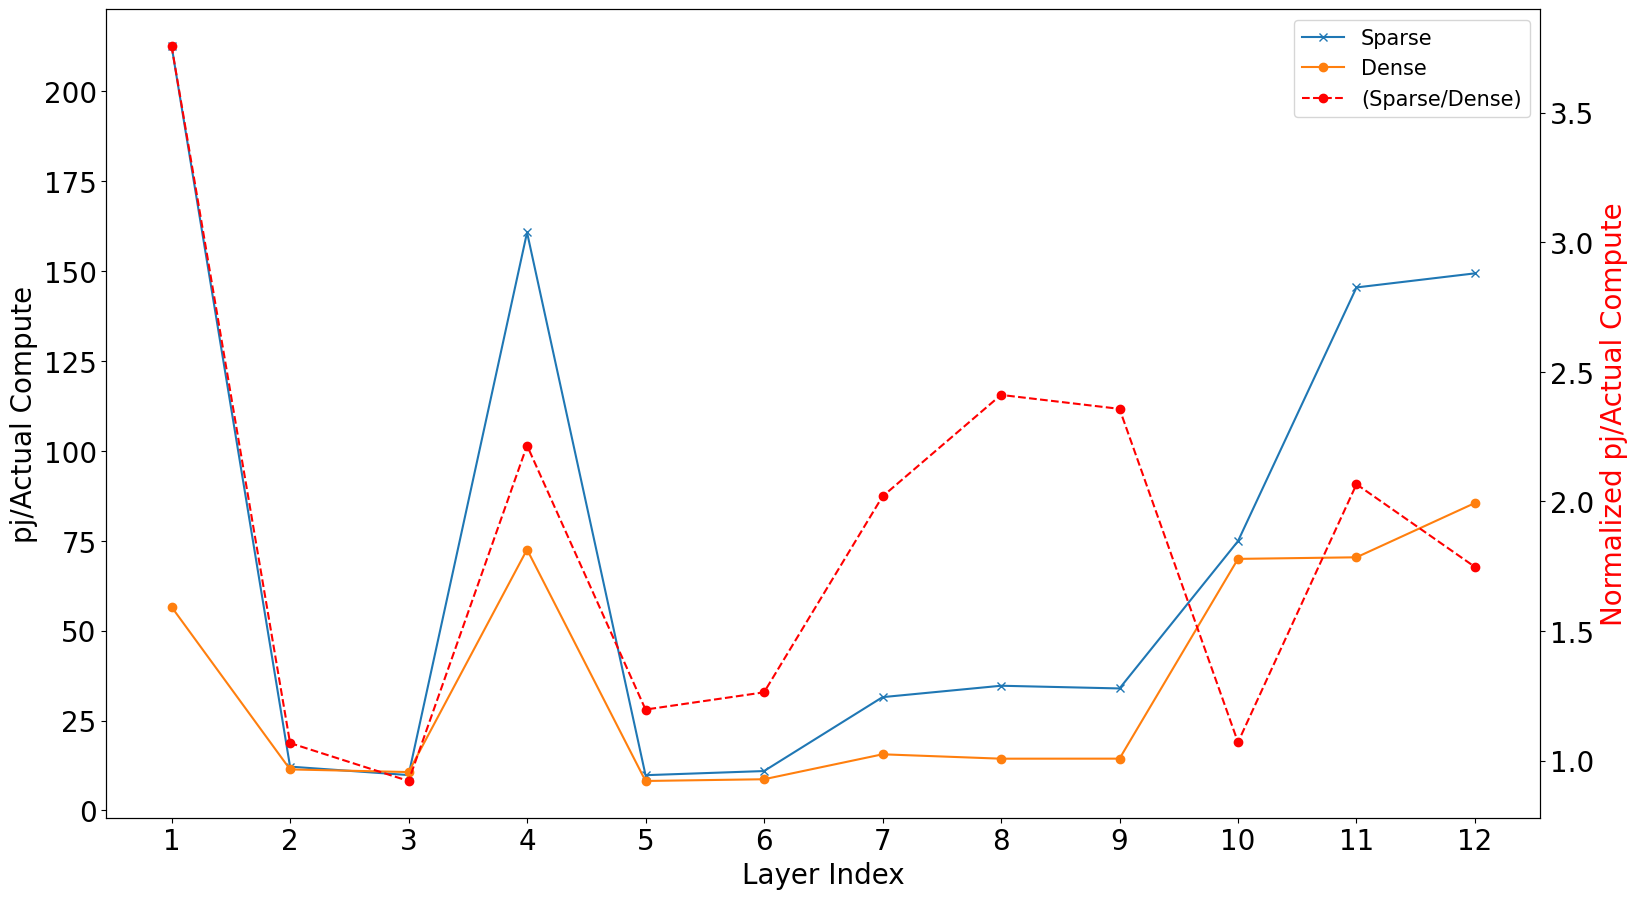

<Figure size 4000x2000 with 0 Axes>

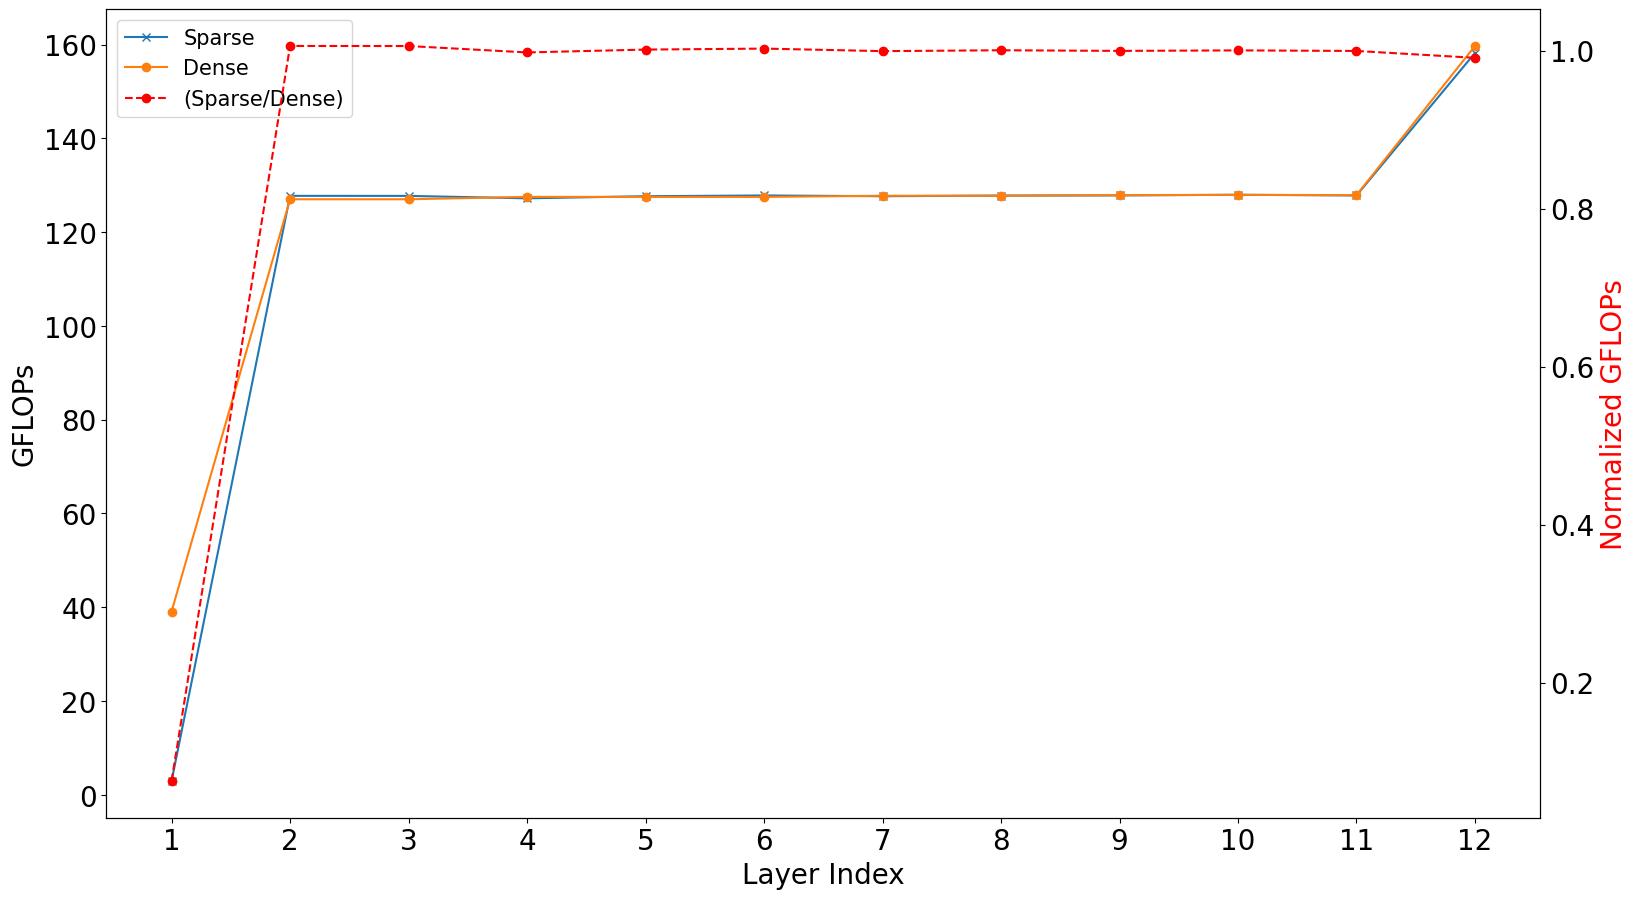

In [13]:
import numpy as np
import matplotlib.pyplot as plt

elems = {
    "Energy": energy,
    "Actual computes": actual_computes,
    "Cycles":cycles,
#     "Actual Computes": actual_computes,
    "Algorithmic Computes": algorithmic_computes,
    "pj/Algorithmic Compute":pjs_algorithmic,
    "pj/Actual Compute":pjs_actual,
    "GFLOPs":gflops
}
for key in elems:
    arr = elems[key]
    plt.rcParams.update({'font.size': 20})
    plt.figure(figsize=(40,20))

    fig, ax1 = plt.subplots()
    fig.set_size_inches(18.5, 10.5)

    # Plot dense and sparse energy on the left y-axis
    ax1.plot(range(12), arr[:,0], label="Sparse", marker="x")
    ax1.plot(range(12), arr[:,1], label="Dense", marker="o")
    ax1.set_xlabel("Layer Index")
    ax1.set_ylabel(key)

    # Create another y-axis with the same x-axis to plot the normalized energy
    ax2 = ax1.twinx()
    norm = arr[:,0]/arr[:,1]
    ax2.plot(range(12), norm, label="(Sparse/Dense)".format(key), color="red", linestyle="--", marker="o")
    ax2.set_ylabel("Normalized {}".format(key),color="red")
    
    lines = ax1.get_lines() + ax2.get_lines()
    ax1.legend(lines, [line.get_label() for line in lines],prop={'size':15})
    ax1.set_xticks(range(12))
    ax1.set_xticklabels(np.arange(1,13))
    
    

    if key.startswith("pj"):
        filename = "Normalized pj_{}".format(key.split("/")[-1])
    else:
        filename = "Normalized {}".format(key)
    print(filename)
    plt.savefig("{}/{}.pdf".format(plot_folder,filename), dpi=200)



In [21]:
total = {}
for key in elems:
    arr = elems[key]
    sparse_total = np.sum(arr[:,0])
    dense_total = np.sum(arr[:,1])
    ratio_total = sparse_total/dense_total
    total["total sparse {}".format(key)] = sparse_total
    total["total dense {}".format(key)] = dense_total
    total["{} ratio".format(key)] = ratio_total
df_total = pd.DataFrame(total,index=[0])
df_total.to_csv("{}/Total Metrics.csv".format(plot_folder),index=False)